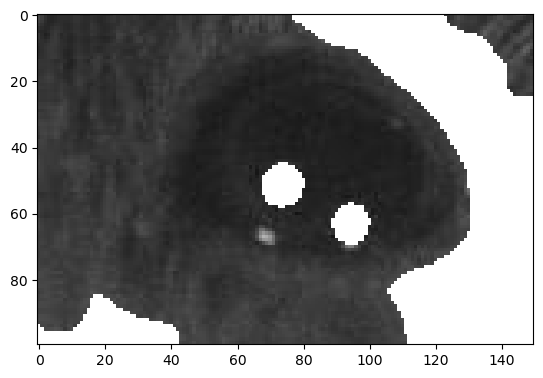

In [5]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

picture_rgb = cv2.imread(r'X:\PupilTraining-Matt-2023-07-07\labeled-data\230518_E189\img009857.png',1)
picture = cv2.cvtColor(picture_rgb, cv2.COLOR_BGR2GRAY)

blurred_picture = cv2.GaussianBlur(picture, (15,15), cv2.BORDER_DEFAULT)
# canny_picture = cv2.Canny(blurred_picture, 41,41)
# cv2.imshow('Blurred', canny_picture)

# Simple Thresholding
threshold, thresh = cv2.threshold(blurred_picture, 105, 255, cv2.THRESH_OTSU)
# contours, hierarchies = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
thresh_inv = cv2.bitwise_not(thresh)
stacked = np.dstack((thresh_inv,thresh_inv,thresh_inv))
img = cv2.bitwise_and(picture_rgb, stacked)
foreground = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
foreground[np.all(foreground == (0, 0, 0), axis=-1)] = (255,255,255)

cv2.imwrite('Attempt_1.png',foreground)

# # cv2.drawContours(blank_picture, contours[:0], -1, (0,0,255), 1)
# cv2.imshow('Original', picture)
# cv2.waitKey(0) 
plt.imshow(foreground, cmap='gray')

c:\Users\Han lab\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


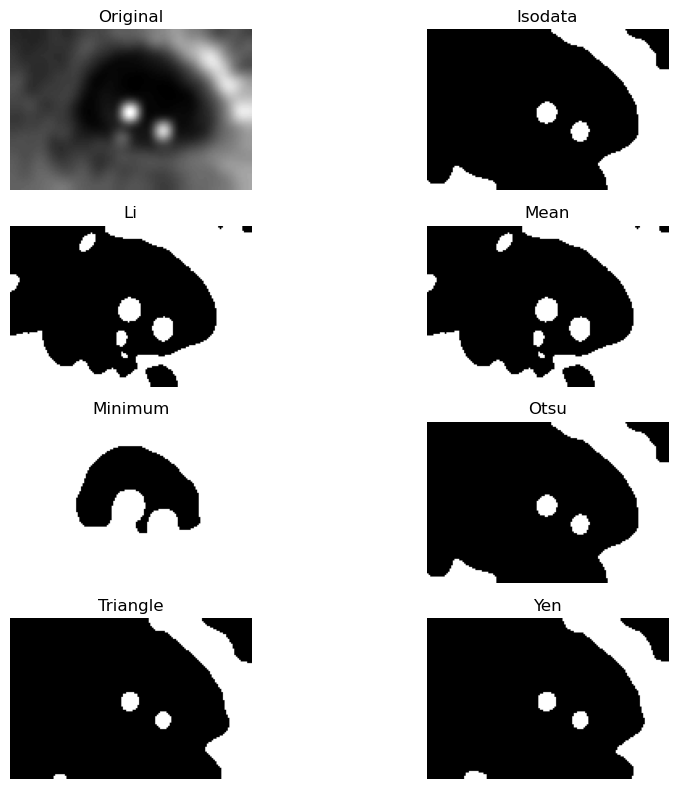

In [6]:
from skimage.filters import try_all_threshold

img = blurred_picture

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [1]:
def otsu_helper(otsufld, inn, size, otsu_factor):
    
    #load
    arr = load_np(inn)
    raw = np.copy(arr[0])
    lbl = np.copy(arr[1])
    
    #save input
    tifffile.imsave(os.path.join(otsufld, "{}_img.tif".format(os.path.basename(inn)[:-4])), raw.astype("float32"))
    
    #save input
    otsu = otsu_dilate(raw, lbl, size=size, otsu_factor=otsu_factor)
    tifffile.imsave(os.path.join(otsufld, "{}_lbl.tif".format(os.path.basename(inn)[:-4])), otsu.astype("float32"))

    print(inn)
    
    return

def otsu_dilate(arr0, arr1, size=(8,60,60), otsu_factor=0.8):
    """4d arr
    arr0=raw data
    arr1=points
    size=(z,y,x)
    otsu_factor - scaling of the otsu value, >1 is less stringent, <1 remove more pixels
    """
    #get points
    pnts = np.asarray(np.nonzero(arr1)).T.astype("int64")
    outarr = np.zeros_like(arr1)
    
    for pnt in pnts:
        #print pnt
        vol = np.copy(arr0[np.max((pnt[0]-size[0],0)):pnt[0]+size[0], np.max((pnt[1]-size[1],0)):pnt[1]+size[1], np.max((pnt[2]-size[2],0)):pnt[2]+size[2]])*1.0
        #vol = filters.gaussian(vol, 1)
        v=filters.threshold_otsu(vol)/float(otsu_factor)
        vol[vol<v]=0
        vol[vol>=v]=1
        nvol = np.maximum(outarr[np.max((pnt[0]-size[0],0)):pnt[0]+size[0], np.max((pnt[1]-size[1],0)):pnt[1]+size[1], np.max((pnt[2]-size[2],0)):pnt[2]+size[2]], vol)
        outarr[np.max((pnt[0]-size[0],0)):pnt[0]+size[0], np.max((pnt[1]-size[1],0)):pnt[1]+size[1], np.max((pnt[2]-size[2],0)):pnt[2]+size[2]]=nvol
    
    return outarr